In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
import copy as cp
import sys, json, pickle
PROJECT_PATHS = ['/home/nbuckman/Dropbox (MIT)/DRL/2020_01_cooperative_mpc/mpc-multiple-vehicles/', '/Users/noambuckman/mpc-multiple-vehicles/']
for p in PROJECT_PATHS:
    sys.path.append(p)
import src.traffic_world as tw
import src.multiagent_mpc as mpc
import src.car_plotting_multiple as cmplot
import src.solver_helper as helper
import src.vehicle as vehicle

In [2]:
params = {
    "car_densities": [1250, 5000, 650, 5000, 1250,],
    "car_dens_p": [0.2, 0.2, 0.2, .1, .2],
    "n_other": 100,
    "n_lanes": 3,
    "seed": 1,
    "random_svo": 1,
    "T": 5,
    "dt": 0.2,
}


params["N"] = max(1, int(params["T"]/params["dt"]))

world = tw.TrafficWorld(params["n_lanes"], 0, 999999)

In [3]:
MAX_VELOCITY = 25 * 0.447 # m/s
VEHICLE_LENGTH = 4.5 #m
## Some quick checks and normailzation of the proportion of vehicles in each segment
assert len(params["car_densities"]) == len(params["car_dens_p"])
total_density = sum(params["car_dens_p"])
params["car_dens_p"] = [p/total_density for p in params["car_dens_p"]]
car_densities_p = [(params["car_densities"][i], params["car_dens_p"][i]) for i in range(len(params["car_densities"]))] 

max_density = max(params["car_densities"])
time_duration_s = (params["n_other"] * 3600.0 / max_density) * 10 # amount of time to generate traffic

initial_vehicle_positions = helper.poission_positions_multiple(car_densities_p, params["n_other"], int(time_duration_s), params["n_lanes"] , MAX_VELOCITY, VEHICLE_LENGTH, position_random_seed = params["seed"])
position_list = initial_vehicle_positions[:params["n_other"]]
print(len(position_list))
if params['random_svo'] == 1:
    list_of_svo = [np.random.choice([0, np.pi/4.0, np.pi/2.01]) for i in range(params["n_other"])]
else:
    list_of_svo = [params["svo_theta"] for i in range(params["n_other"])]
amb_MPC, amb_x0, all_other_MPC, all_other_x0 = helper.initialize_cars_from_positions(params["N"], params["dt"], world,  
                                                            True, position_list, list_of_svo)    


1250 0.2222222222222222
5000 0.2222222222222222
650 0.2222222222222222
5000 0.1111111111111111
1250 0.2222222222222222
100


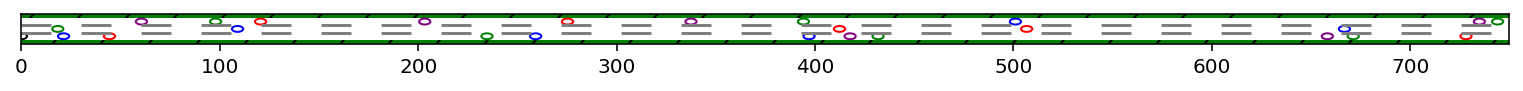

In [13]:
amb_x0 = amb_x0.reshape(6,1)
all_other_x0 = [x.reshape(6,1) for x in all_other_x0]

cmplot.plot_multiple_cars(0, world, amb_MPC, amb_x0, all_other_x0, None, 'Ellipse', None, None, None, [0, 750])
plt.show()

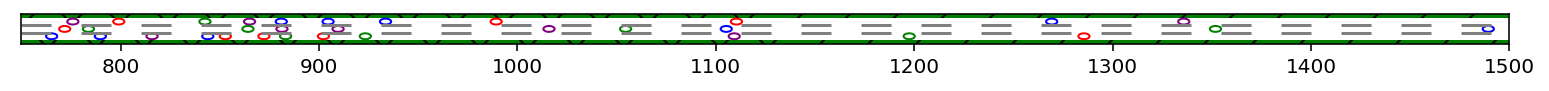

In [14]:
amb_x0 = amb_x0.reshape(6,1)
all_other_x0 = [x.reshape(6,1) for x in all_other_x0]

cmplot.plot_multiple_cars(0, world, amb_MPC, amb_x0, all_other_x0, None, 'Ellipse', None, None, None, [750, 1500])
plt.show()

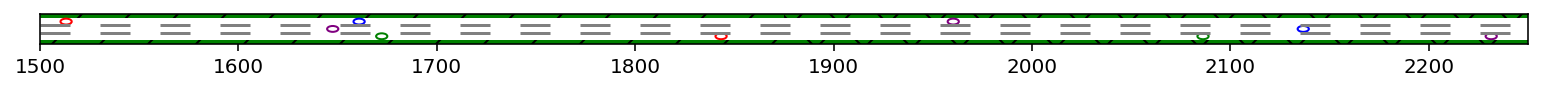

In [15]:
amb_x0 = amb_x0.reshape(6,1)
all_other_x0 = [x.reshape(6,1) for x in all_other_x0]

cmplot.plot_multiple_cars(0, world, amb_MPC, amb_x0, all_other_x0, None, 'Ellipse', None, None, None, [1500, 1500+750])
plt.show()

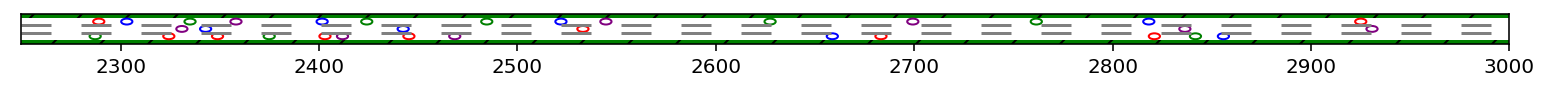

In [16]:
amb_x0 = amb_x0.reshape(6,1)
all_other_x0 = [x.reshape(6,1) for x in all_other_x0]

cmplot.plot_multiple_cars(0, world, amb_MPC, amb_x0, all_other_x0, None, 'Ellipse', None, None, None, [2250, 3000])
plt.show()

In [60]:
max(all_other_x0,key=lambda x: x[0])

array([2930.74756,    3.7    ,    0.     ,    0.     ,   11.06325,
          0.     ])

In [2]:
load_log_dir = "/home/nbuckman/mpc_results/d1dh-0h64-20200918-160320/"
with open(load_log_dir + "params.json",'rb') as fp:
    params = json.load(fp)

In [3]:
params["svo_theta"] = np.pi/3.0
no_grass = False
random_lane = False
x_variance = 1.0
list_of_positions = None
params["n_lanes"] = 2
params["n_other"] = 100

In [4]:
world = tw.TrafficWorld(params["n_lanes"], 0, 999999)

In [5]:
params["car_density"] = [5000, 
params["random_svo"] = True

In [6]:
# This should be replaced with random placement
MAX_VELOCITY = 25 * 0.447 # m/s
VEHICLE_LENGTH = 4.5 #m
time_duration_s = (params["n_other"] * 3600.0 / params["car_density"] ) * 5 # amount of time to generate traffic
initial_vehicle_positions = helper.poission_positions(params["car_density"], int(time_duration_s), params["n_lanes"] , MAX_VELOCITY, VEHICLE_LENGTH)
position_list = initial_vehicle_positions[:params["n_other"]]
if params['random_svo']:
    list_of_svo = [np.random.choice([0, np.pi/4.0, np.pi/2.01]) for i in range(params["n_other"])]
else:
    list_of_svo = None
amb_MPC, amb_x0, all_other_MPC, all_other_x0 = helper.initialize_cars_from_positions(params["N"], params["dt"], world, params["svo_theta"], 
                                                            True, 
                                                            position_list, list_of_svo)    

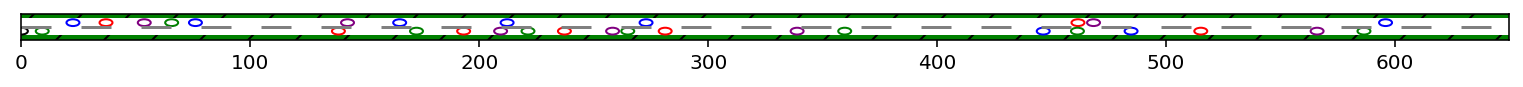

In [9]:
amb_x0 = amb_x0.reshape(6,1)
all_other_x0 = [x.reshape(6,1) for x in all_other_x0]

cmplot.plot_multiple_cars(0, world, amb_MPC, amb_x0, all_other_x0, None, 'Ellipse', None, None, None, [0, 650])
plt.show()

In [92]:
len(all_other_x0)

100

In [34]:
cars_per_hour = 5000
total_seconds = time_duration_s
cars_per_second = cars_per_hour / 3600.0
dt = 0.20
cars_per_dt = cars_per_second * dt
rng = np.random.default_rng()
n_cars_per_second = rng.poisson(cars_per_second, total_seconds)
total_dt = int(total_seconds / dt)
n_cars_per_dt = rng.poisson(cars_per_dt, total_dt)


vehicle_x_distance = [[(rng.uniform(0.95, 1.0)*average_velocity)*(s + rng.uniform(0,1))]*n_cars_per_second[s] for s in range(len(n_cars_per_second))]
vehicle_x_distance = [[(rng.uniform(0.95, 1.0)*average_velocity)*(s*dt)]*n_cars_per_dt[s] for s in range(len(n_cars_per_second))]


all_vehicle_positions = []

### Random place vehicles in the lanes
for s in range(len(vehicle_x_distance)):
    if len(vehicle_x_distance[s]) == 0:
        continue
    else:
        for j in range(len(vehicle_x_distance[s])):
            all_vehicle_positions += [(rng.integers(0, n_lanes), vehicle_x_distance[s][j])]

# Remove cars that would have collided
prev_car_lane = -9999 * np.ones((n_lanes,1))
prev_car_lane[0] = 0.0
initial_vehicle_positions = []
for (lane, x) in all_vehicle_positions:
    if x > prev_car_lane[lane] + 1.4*car_length:
        initial_vehicle_positions += [(lane, float(x))]
        prev_car_lane[lane] = x


TypeError: 'float' object cannot be interpreted as an integer

In [8]:
import numpy as np


In [9]:
cars_per_hour = 500 #cars per hour
cars_per_second = cars_per_hour / 3600.0
total_minutes = 15
total_seconds = total_minutes * 60
print(cars_per_second)

0.1388888888888889


In [10]:
average_velocity = all_other_x0[4][4]

In [93]:
def poission_positions(cars_per_hour, total_seconds, n_lanes, average_velocity, car_length):
    cars_per_second = cars_per_hour / 3600.0
    rng = np.random.default_rng()
    n_cars_per_second = rng.poisson(cars_per_second, total_seconds)
    
    vehicle_x_distance = [[average_velocity*(s + rng.uniform(0,1))]*n_cars_per_second[s] for s in range(len(n_cars_per_second))]
    
    all_vehicle_positions = []
    for s in range(len(vehicle_x_distance)):
        if len(vehicle_x_distance[s]) == 0:
            continue
        else:
            for j in range(len(vehicle_x_distance[s])):
                all_vehicle_positions += [(rng.integers(0, n_lanes), vehicle_x_distance[s][j])]

#     all_vehicle_positions = [(x, rng.integers(0,params["n_lanes"])) for x in all_vehicle_distances]

    # Remove cars that would have collided
    prev_car_lane = -9999 * np.ones(n_lanes)
    prev_car_lane[0] = 0.0
    initial_vehicle_positions = []
    for (lane, x) in all_vehicle_positions:
        if x > prev_car_lane[lane] + 1.1*car_length:
            initial_vehicle_positions += [(lane, float(x))]
            prev_car_lane[lane] = x

    return initial_vehicle_positions
    # counter = 0
    # for x in all_vehicle_distances:
    #     if counter == 0:
    #         lane = 0
    #     elif x > (all_vehicle_positions[counter - 1][0] + 1.1*amb_MPC.L):
    #         # Vehicle is sufficiently far away, place in lane 0
    #         lane = rng.integers(0, 2)
    #     else:
    #         lane = 1 - all_vehicle_positions[counter-1][1]
    #     all_vehicle_positions += [(x, lane)]
    #     counter += 1

In [104]:
params["n_lanes"] = 2
world = tw.TrafficWorld(params["n_lanes"], 0, 999999)

In [105]:
initial_vehicle_positions = poission_positions(3000, 5 * 60, params["n_lanes"] , all_other_x0[0][4], all_other_MPC[0].L)
amb_MPC, x0_amb, all_other_MPC, all_other_x0 = helper.initialize_cars_from_positions(params["N"], params["dt"], world, params["svo_theta"], 
                                                               no_grass, 
                                                               initial_vehicle_positions)

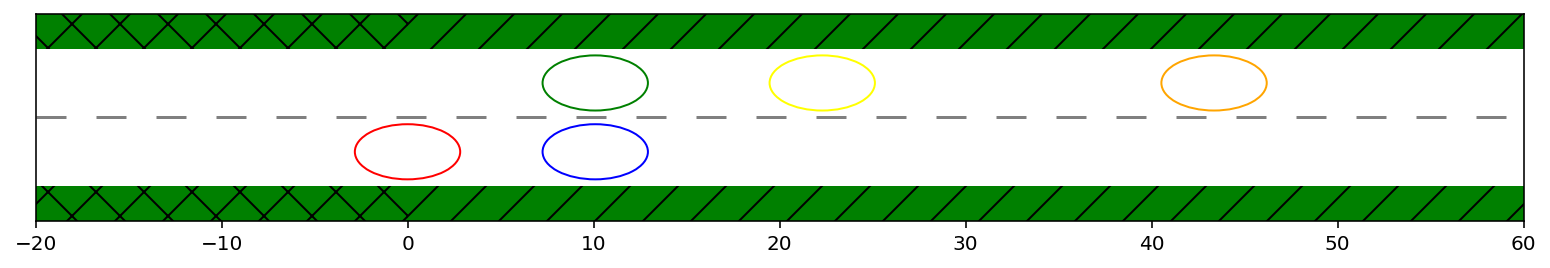

In [106]:
x0_amb = x0_amb.reshape(6,1)
all_other_x0 = [x.reshape(6,1) for x in all_other_x0]

cmplot.plot_multiple_cars(0, world, amb_MPC, x0_amb, all_other_x0, None)
plt.show()

In [107]:
len(all_other_x0)

195

In [108]:
3000 / 60 * 5

250.0